In [4]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/he-chang/data5100project/main/university_data_grad_and_cohort.csv")

In [8]:
df.head()

,institute_id,year,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,co_total,co_AmerInd_AlaskNtv,co_Asian,co_AfrAmer,co_Hispanic,co_Hi_PacIsland,co_White,co_2orMore,co_unknown,co_nonresAlien
0,102845,2010,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,102845,2011,30.0,2.0,2.0,1.0,0.0,0.0,23.0,1.0,...,32,2.0,2.0,1.0,0.0,0.0,25.0,1.0,0.0,1.0
2,102845,2012,93.0,12.0,19.0,6.0,1.0,0.0,53.0,2.0,...,277,41.0,41.0,25.0,9.0,0.0,155.0,3.0,3.0,0.0
3,102845,2013,294.0,42.0,38.0,29.0,8.0,0.0,167.0,5.0,...,832,136.0,125.0,82.0,28.0,5.0,437.0,11.0,8.0,0.0
4,102845,2014,307.0,22.0,11.0,14.0,72.0,7.0,139.0,10.0,...,670,75.0,36.0,53.0,124.0,21.0,283.0,20.0,58.0,0.0


In [9]:
def calcPercentage(overall_total, group_total):
    if overall_total == 0:
        return None
    else:
        return group_total / overall_total

In [10]:
def getCohortGroupTotal(group_name):
  new_group_name = group_name
  return new_group_name.replace("gr", "co")

In [11]:
cohort_groups = ['co_AmerInd_AlaskNtv', 'co_Asian', 'co_AfrAmer', 'co_Hispanic', 'co_Hi_PacIsland', 'co_White', 'co_2orMore', 'co_unknown', 'co_nonresAlien']

for group in cohort_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['co_total'], x[group]), axis = 1)

df.head()

,institute_id,year,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,co_nonresAlien,co_AmerInd_AlaskNtv_pct,co_Asian_pct,co_AfrAmer_pct,co_Hispanic_pct,co_Hi_PacIsland_pct,co_White_pct,co_2orMore_pct,co_unknown_pct,co_nonresAlien_pct
0,102845,2010,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,102845,2011,30.0,2.0,2.0,1.0,0.0,0.0,23.0,1.0,...,1.0,0.062500,0.062500,0.031250,0.000000,0.000000,0.781250,0.031250,0.000000,0.03125
2,102845,2012,93.0,12.0,19.0,6.0,1.0,0.0,53.0,2.0,...,0.0,0.148014,0.148014,0.090253,0.032491,0.000000,0.559567,0.010830,0.010830,0.00000
3,102845,2013,294.0,42.0,38.0,29.0,8.0,0.0,167.0,5.0,...,0.0,0.163462,0.150240,0.098558,0.033654,0.006010,0.525240,0.013221,0.009615,0.00000
4,102845,2014,307.0,22.0,11.0,14.0,72.0,7.0,139.0,10.0,...,0.0,0.111940,0.053731,0.079104,0.185075,0.031343,0.422388,0.029851,0.086567,0.00000


In [24]:
#Creating a cohort pie chart based on year
def circle_cohort(x):

    (
    df[cohort_groups].
        iloc[x].
        plot(kind = 'pie',
                labels = cohort_groups,
                autopct = '%1.1f%%',
                figsize=(10,10), fontsize = 15, rotatelabels=True)
    )

    circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
    plt.gca().add_artist(circle)

    plt.ylabel(' ')
    plt.axis('square')

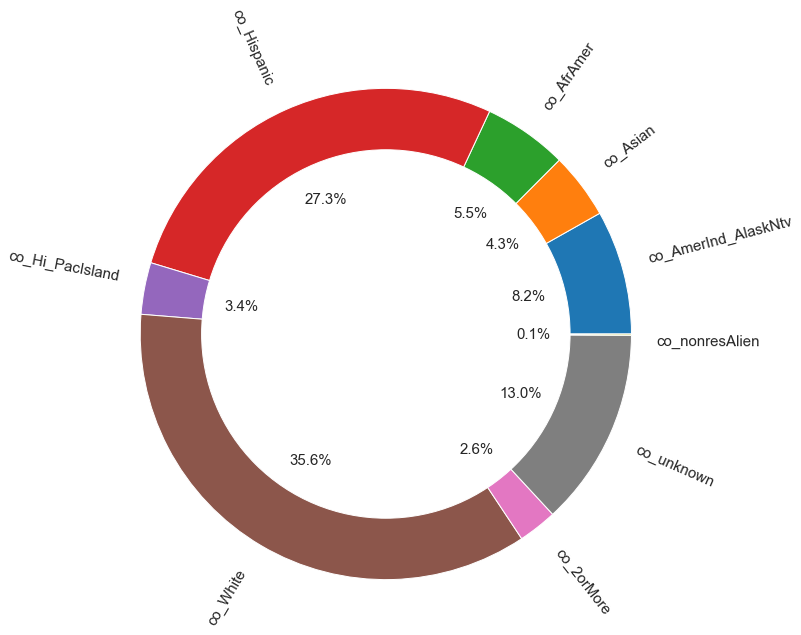

In [38]:
circle_cohort(5)

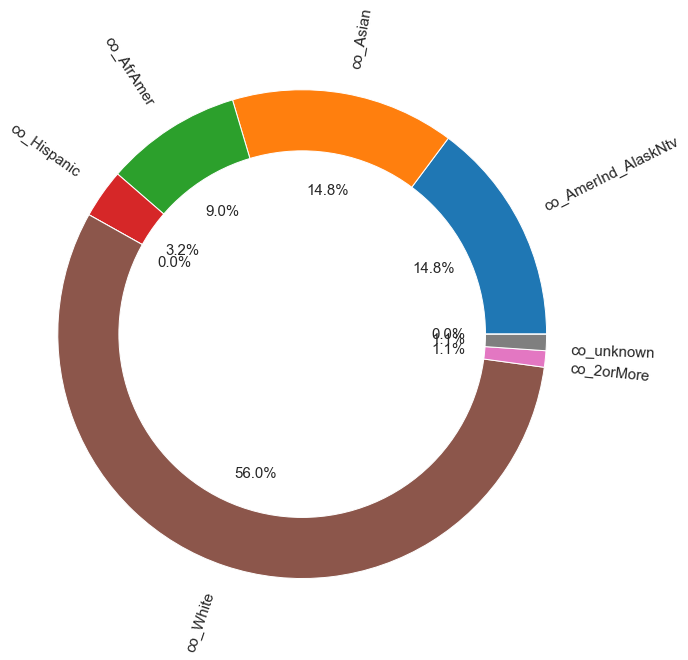

In [28]:
circle_cohort(2)

In [12]:
grad_groups = ['gr_AmerInd_AlaskNtv', 'gr_Asian', 'gr_AfrAmer', 'gr_Hispanic', 'gr_Hi_PacIsland', 'gr_White', 'gr_2orMore', 'gr_unknown', 'gr_nonresAlien']

for group in grad_groups:
  new_column_name = group + "_pct"
  total_group = getCohortGroupTotal(group)
  df[new_column_name] = df.apply(lambda x: calcPercentage(x[total_group], x[group]), axis = 1)

df.head()

,institute_id,year,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,co_nonresAlien_pct,gr_AmerInd_AlaskNtv_pct,gr_Asian_pct,gr_AfrAmer_pct,gr_Hispanic_pct,gr_Hi_PacIsland_pct,gr_White_pct,gr_2orMore_pct,gr_unknown_pct,gr_nonresAlien_pct
0,102845,2010,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102845,2011,30.0,2.0,2.0,1.0,0.0,0.0,23.0,1.0,...,0.03125,1.000000,1.000000,1.000000,NaN,NaN,0.920000,1.000000,NaN,1.0
2,102845,2012,93.0,12.0,19.0,6.0,1.0,0.0,53.0,2.0,...,0.00000,0.292683,0.463415,0.240000,0.111111,NaN,0.341935,0.666667,0.000000,NaN
3,102845,2013,294.0,42.0,38.0,29.0,8.0,0.0,167.0,5.0,...,0.00000,0.308824,0.304000,0.353659,0.285714,0.000000,0.382151,0.454545,0.625000,NaN
4,102845,2014,307.0,22.0,11.0,14.0,72.0,7.0,139.0,10.0,...,0.00000,0.293333,0.305556,0.264151,0.580645,0.333333,0.491166,0.500000,0.551724,NaN


In [42]:
def circle_grad(x):
    (
    df[grad_groups].
        iloc[4].
        plot(kind = 'pie',
                labels = grad_groups,
                autopct = '%1.1f%%',
                figsize=(10,10), fontsize = 15, rotatelabels=True)
    )

    circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
    plt.gca().add_artist(circle)

    plt.ylabel(' ')
    plt.axis('square')

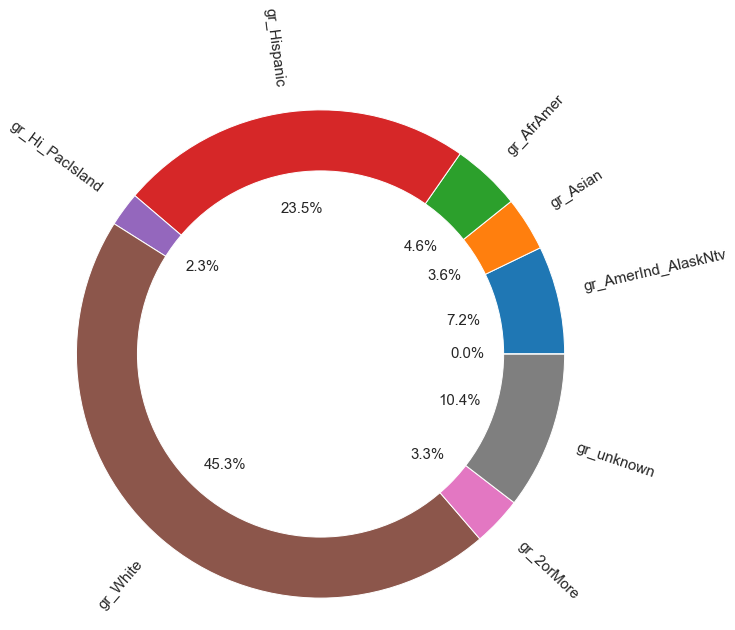

In [43]:
circle_grad(5)

In [29]:
df.to_csv("C:\\project\\university_data.csv")